In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

feature_descriptions = pd.read_csv("NUSW-NB15_features.csv", encoding='cp1252')
train = pd.read_csv("UNSW_NB15_training-set.csv", encoding='cp1252').drop(["ï»¿id"], axis=1)

feature_descriptions

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


## Categorical Features

In [59]:
#dummy encoding of categorical/nominal features
nominal = train[["proto","service", "state"]]

dummies = pd.get_dummies(nominal.proto, prefix = "proto").join(pd.get_dummies(nominal.service, prefix = "service")).join(pd.get_dummies(nominal.state, prefix = "state"))
dummies

,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
175337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
175338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
175339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [60]:
numerical = train.iloc[:,4:42]

numerical

,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,...,1,1,1,1,0,0,0,1,1,0
1,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,...,1,1,1,2,0,0,0,1,6,0
2,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,...,2,1,1,3,0,0,0,2,6,0
3,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,...,2,1,1,3,1,1,0,2,1,0
4,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,...,2,2,1,40,0,0,0,2,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,...,24,24,13,24,0,0,0,24,24,0
175337,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,...,1,1,1,2,0,0,0,1,1,0
175338,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,...,3,3,3,13,0,0,0,3,12,0
175339,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,...,30,30,14,30,0,0,0,30,30,0


In [61]:
#Our new features
features = dummies.join(numerical)
features

,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,0,0,0,1,6,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,1,3,0,0,0,2,6,0
3,0,0,0,0,0,0,0,0,0,0,...,2,1,1,3,1,1,0,2,1,0
4,0,0,0,0,0,0,0,0,0,0,...,2,2,1,40,0,0,0,2,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0,0,0,0,0,0,0,0,0,0,...,24,24,13,24,0,0,0,24,24,0
175337,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,0,0,0,1,1,0
175338,0,0,0,0,0,0,0,0,0,0,...,3,3,3,13,0,0,0,3,12,0
175339,0,0,0,0,0,0,0,0,0,0,...,30,30,14,30,0,0,0,30,30,0


In [62]:
#Do the same for the test set
test = pd.read_csv("UNSW_NB15_testing-set.csv", encoding='cp1252').drop(["ï»¿id"], axis=1)

nominal = test[["proto","service", "state"]]
dummies = pd.get_dummies(nominal.proto, prefix = "proto").join(pd.get_dummies(nominal.service, prefix = "service")).join(pd.get_dummies(nominal.state, prefix = "state"))
numerical = test.iloc[:,4:42]

test_features = dummies.join(numerical)

## Importance

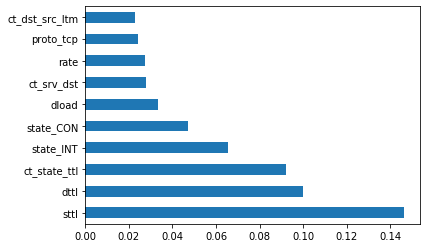

In [63]:
X= features
y = train["label"]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

#plot importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [64]:
#Select features with importance greater than 0.001 less than 0.05
imp_feat = feat_importances[feat_importances > 0.001]
imp_feat = imp_feat[imp_feat < 0.05]
print(imp_feat.index.values)

['proto_arp' 'proto_ospf' 'proto_sctp' 'proto_tcp' 'proto_udp'
 'proto_unas' 'service_-' 'service_dns' 'service_ftp' 'service_ftp-data'
 'service_http' 'service_pop3' 'service_smtp' 'service_ssh' 'state_CON'
 'state_FIN' 'state_REQ' 'spkts' 'dpkts' 'sbytes' 'dbytes' 'rate' 'sload'
 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt' 'sjit' 'djit' 'swin' 'stcpb'
 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat' 'smean' 'dmean' 'trans_depth'
 'response_body_len' 'ct_srv_src' 'ct_dst_ltm' 'ct_src_dport_ltm'
 'ct_dst_sport_ltm' 'ct_dst_src_ltm' 'ct_flw_http_mthd' 'ct_src_ltm'
 'ct_srv_dst' 'is_sm_ips_ports']


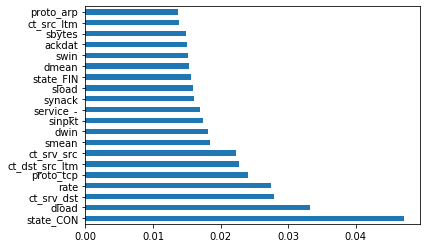

In [71]:
#plot importances
imp_feat.nlargest(20).plot(kind='barh')
plt.show()

In [65]:
features = features[imp_feat.index]
test_features = test_features[imp_feat.index]

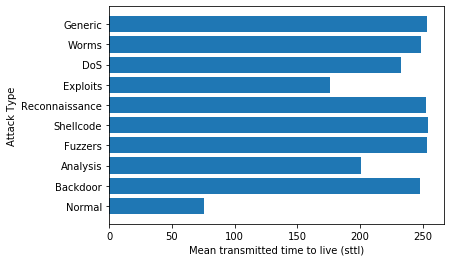

In [66]:
attack_types = train["attack_cat"].unique()

max_spkts = []
for atk in attack_types:
    max_spkts.append(train.loc[np.where(train["attack_cat"] == atk)].describe()["sttl"]["mean"])
    
fig = plt.figure()
plt.ylabel("Attack Type")
plt.xlabel("Mean transmitted time to live (sttl)")
plt.barh(attack_types, max_spkts)
plt.show()

## Correlation Matrix

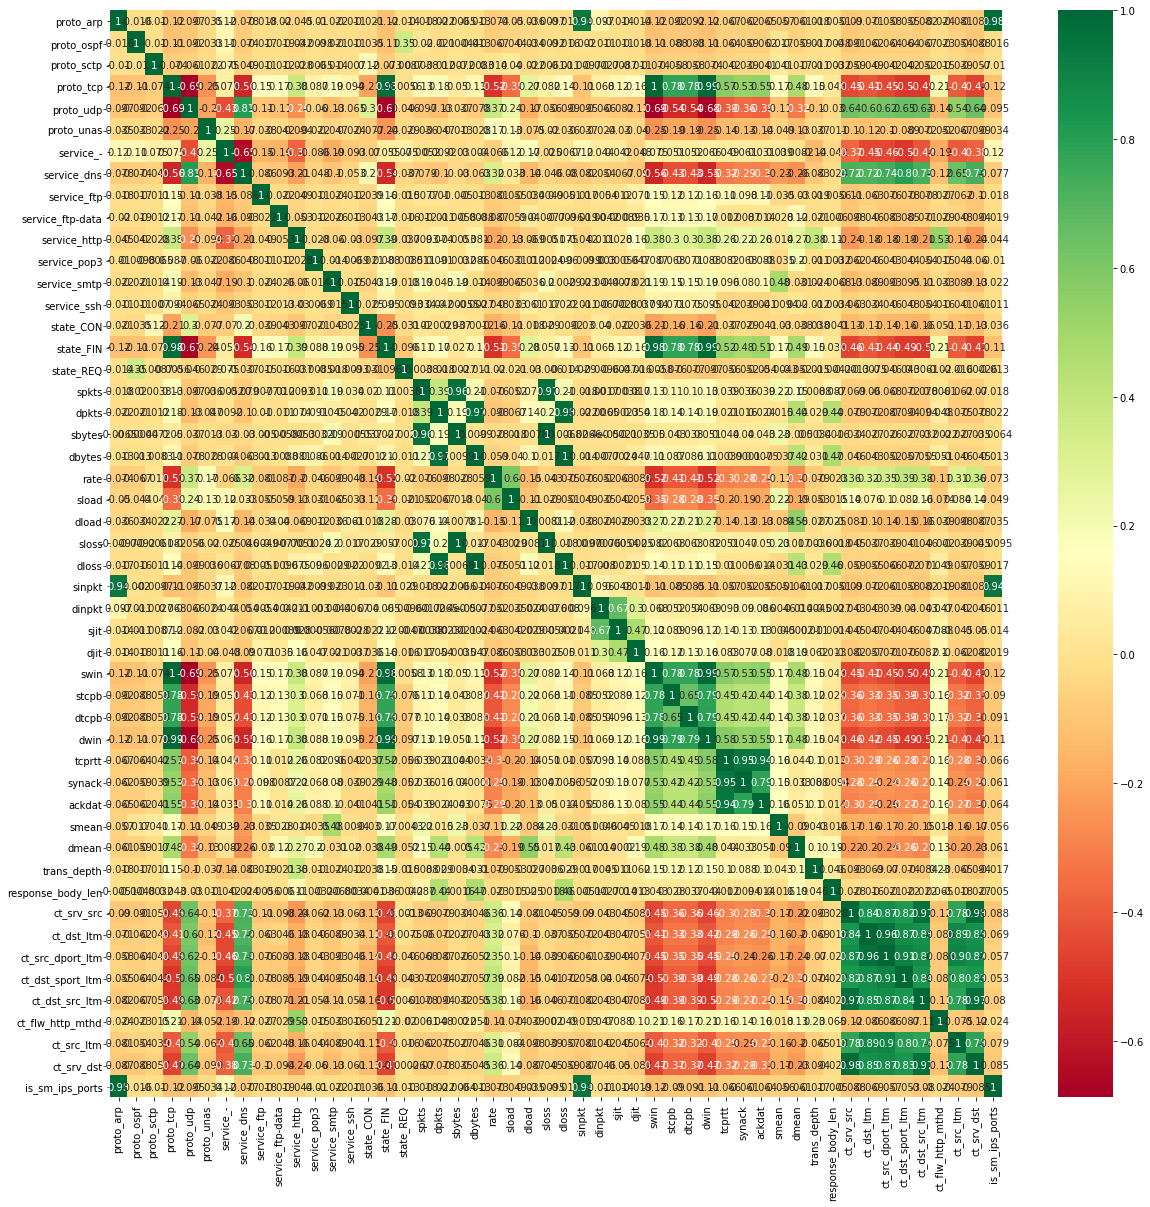

In [67]:
import seaborn as sns

cm = features.corr()
top_features = cm.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(features[top_features].corr(), annot=True, cmap="RdYlGn")

## Final Features

In [68]:
features.to_csv("train", index=False)
test_features.to_csv("test", index=False)